In [1]:
import numpy as np;
from matplotlib import pyplot as plt;
from scipy.linalg import norm;
from sklearn.base import BaseEstimator;
import pandas as pd
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from scipy.linalg import norm;

In [75]:
class LinearReg(BaseEstimator):
    global w_list, predicter
    w_list, predicter = [], []
    def __init__(self, gd_type='FG', 
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3):
        self.gd_type = gd_type;
        self.tolerance = tolerance;
        self.max_iter = max_iter;
        self.w0 = w0;
        self.alpha = alpha;
        self.w = None;
        self.loss_history = None;
    def calc_gradient(self, X, y):
        global w_list
        self.X = X;
        self.y = y;
        self.w0 = np.zeros(self.X.shape[1]);
        self.w = self.w0.copy();
        w_list = [self.w0.copy()]
        for i in range(self.max_iter):
            self.w -= 2*self.alpha*self.X.T.dot(self.X.dot(self.w) - self.y) / self.y.shape[0]
            if np.linalg.norm(w_list[-1] - self.w) > self.tolerance:
                w_list.append(self.w.copy());
            else:
                print('UPS');
                break
        return w_list
    def predict(self, X):
        global w_list, predicter
        self.X = X;
        if self.w is None:
            raise Exception('Not trained yet')
        else:
            pred = self.X.dot(w_list[-1]);
            predicter.append(pred.copy())
        return predicter

In [8]:
X_test_1 = X_test[['vendor_id', 'passenger_count', 'store_and_fwd_flag']];
standard = StandardScaler().fit_transform(X_test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])
X_test = np.hstack([X_test_1, standard])

In [76]:
proba = LinearReg()
FG = proba.calc_gradient(X_test, y_test)
print(X_test.dot(FG[-1]))

[4.63232985 6.71842556 7.06592457 ... 4.60079182 4.54940425 6.74848592]


In [99]:
proba.predict(X_test)

[array([4.73241468, 4.70389673, 4.75800962, ..., 6.700279  , 5.30692653,
        7.44904893])]

In [2]:
data = pd.read_csv('train_3.csv');
data.drop('dropoff_datetime', inplace = True, axis = 1);
dic =  {'N': 1, 'Y':0}
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(dic)

In [3]:
def optimization(a):
    for i in a.columns:
        if a[i].dtype == 'int64':
            a[i] = pd.to_numeric(a[i], downcast='unsigned');
        elif a[i].dtype == 'float64':
            a[i] = pd.to_numeric(a[i], downcast = 'float');
data.pipe(optimization)

In [7]:
X = data.drop(['trip_duration', 'pickup_datetime', 'id'], axis=1);
y = np.log1p(data.trip_duration);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [100]:
tolerance = 1e-4;
max_iter = 1000;
w0 = np.zeros(X_test.shape[1]);
w = w0.copy();
alpha = 1e-3;
w_list = [w0.copy()]
for i in range(max_iter):
        w -= 2*alpha*X_test.T.dot(X_test.dot(w) - y_test) / y_test.shape[0]
        if np.linalg.norm(w_list[-1] - w) > tolerance:
            w_list.append(w.copy())
        else: 
            print('ups')
            break

In [101]:
print(w_list[-1])
print(X_test.dot(w_list[-1]))

[ 2.14294794  0.38011464  2.10186003  0.08589523 -0.08605684  0.0422726
 -0.06773051]
[4.73241468 4.70389673 4.75800962 ... 6.700279   5.30692653 7.44904893]


In [102]:
print(X_test.shape)

(145865, 7)


In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression();
lr.fit(X_test, y_test)
#print(lr.predict(X_test_1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#SGD
alpha = 6e-7;
w_0 = np.zeros(X_test.shape[1]);
w = w_0.copy();
tolerance=1e-4;
h = np.zeros(shape=(X_test.shape[1], max_iter+1));
w_sgd = [w_0.copy()]
for i in range(max_iter):
    sample = np.random.choice(X_test.shape[0], size=3000)
    w -= alpha*2*X_test[sample].T.dot(X_test[sample].dot(w) - y_test.iloc[sample]) 
    / y_test.iloc[sample].shape[0]
    if np.linalg.norm(w_sgd[-1] - w) > tolerance:
        w_sgd.append(w.copy())
    else: 
        print('UPS');
        break

In [49]:
#Momentum
eta = 0.1;
w_0 = np.zeros(X_test.shape[1]);
w = w_0.copy();
tolerance = 1e-4;
alpha = 2e-6;
h = np.zeros(shape=(X_test.shape[1], max_iter+1));
w_momentum = [w_0.copy()]
for i in range(max_iter):
    sample = np.random.choice(X_test.shape[0], size=300)
    h[:, i+1] = (1-eta)*h[:, i] + alpha*eta*2*X_test[sample].T.dot(X_test[sample].dot(w) - y_test.iloc[sample]) 
    / y_test.iloc[sample].shape[0]
    w -= h[:, i+1];
    if np.linalg.norm(w_momentum[-1] - w) > tolerance:
        w_momentum.append(w.copy())
    else: 
        print('UPS');
        break

In [60]:
#Adam
max_iter=1000;
alpha = 2e-2;
tolerance = 1e-4;
b_1 = 0.95;
b_2 = 0.95;
eps = 1e-6;
m = np.zeros(shape=(X_test.shape[1], max_iter+1));
v = np.zeros(shape=(X_test.shape[1], max_iter+1));
m_pred, v_pred = [], [];
w = np.zeros(X_test.shape[1]);
w_adam = [w.copy()]
for i in range(max_iter):
    sample = np.random.choice(X_test.shape[0], size = 300)
    m[:, i+1] = b_1*m[:, i] + (1-b_1)*X_test[sample].T.dot(X_test[sample].dot(w) - y_test.iloc[sample]) / y_test.iloc[sample].shape[0]
    v[:, i+1] = b_2*v[:, i] + (1-b_2)*((X_test[sample].T.dot(X_test[sample].dot(w) - y_test.iloc[sample]) / y_test.iloc[sample].shape[0])**2);
    m_pred.append(m[:, i+1]/(1 - b_1));
    v_pred.append(v[:, i+1]/(1 - b_2));
    w -= alpha*m_pred[-1] / np.sqrt(v_pred[-1] + eps)
    if np.linalg.norm(w_adam[-1] - w) > tolerance:
        w_adam.append(w.copy())
    else:
        print('UPS');
        break    

In [61]:
print(FG[-1])
print(w_sgd[-1])
print(w_momentum[-1])
print(w_adam[-1])

[ 2.14677961  0.3739195   2.10227669  0.04436242 -0.08151201  0.02554212
 -0.05092212]
[ 2.14359098  0.12488474  2.66832399  0.06497216 -0.0856076   0.03386002
 -0.03917584]
[ 1.98945415  0.67715637  1.69326374  0.04259394 -0.0572307   0.02903835
 -0.04482736]
[ 0.21157017 -0.00628362  6.20418511  0.45646549 -0.02651546  0.34096762
 -0.08662494]


In [54]:
def nor(X_test, w, y_test):
    norma = [];
    for i in range(len(w)):
        norma.append(norm(X_test.T.dot(X_test.dot(w[i]) - y_test)))
    return norma

In [27]:
def MSE(X_test, w, y_test):
    loss = [];
    for i in range(len(w)):
        loss.append(np.mean(np.power((X_test.dot(w[i]) - y_test), 2)))
    return loss
def R_2(X_test, w, y_test):
    return (1 - MSE(X_test, w, y_test) / np.mean(y_test))

In [71]:
#loss_fg = MSE(X_test, FG, y_test);
#loss_sgd = MSE(X_test, w_sgd, y_test);
#loss_momentum = MSE(X_test, w_momentum, y_test);
#loss_adam = MSE(X_test, w_adam, y_test);

In [63]:
#r2_fg = R_2(X_test, FG, y_test);
#r2_sgd = R_2(X_test, w_sgd, y_test);
#r2_momentum = R_2(X_test, w_momentum, y_test);
r2_adam = R_2(X_test, w_adam, y_test);

In [64]:
#norm_fg = nor(X_test, FG, y_test);
#norm_sgd = nor(X_test, w_sgd, y_test);
#norm_momentum = nor(X_test, w_momentum, y_test);
norm_adam = nor(X_test, w_adam, y_test);

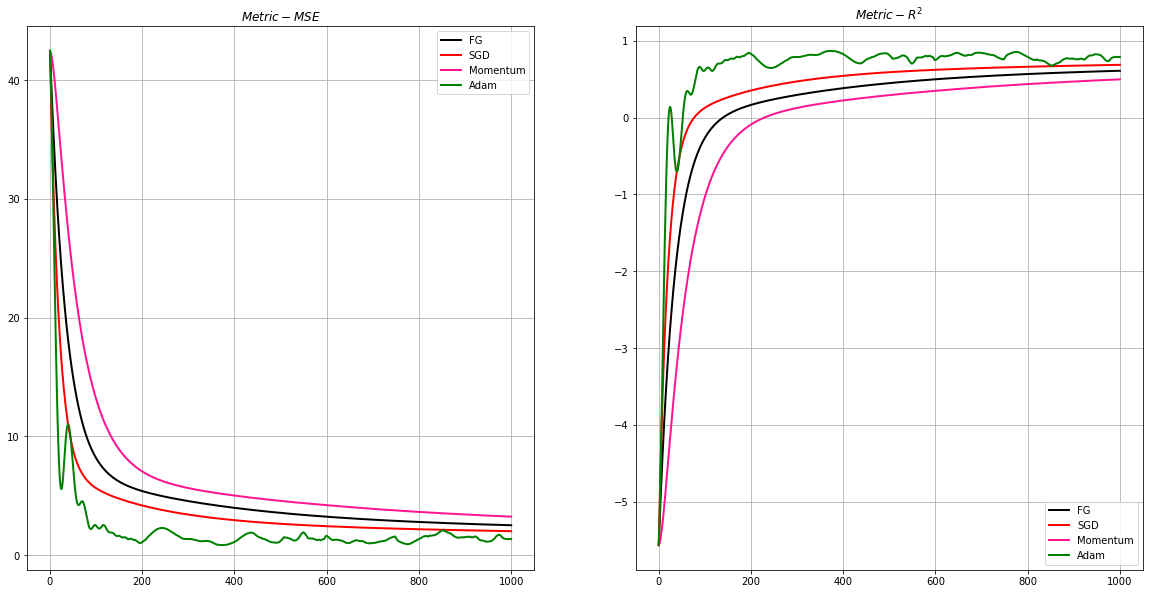

In [78]:
fig = plt.figure(figsize=(20, 10));
ax_1 = fig.add_subplot(1, 2, 1);
ax_1.plot(range(len(FG)), loss_fg, label = 'FG', color = 'black', linewidth = 2);
ax_1.plot(range(len(w_sgd)), loss_sgd, label = 'SGD', color = 'red', linewidth = 2);
ax_1.plot(range(len(w_momentum)), loss_momentum, label='Momentum', color = 'deeppink', linewidth = 2);
ax_1.plot(range(len(w_adam)), loss_adam, label = 'Adam', color = 'green', linewidth = 2);
ax_1.set(title = r'$Metric - MSE$');
ax_1.legend();
ax_1.grid()
ax_2 = fig.add_subplot(1, 2, 2);
ax_2.plot(range(len(FG)), r2_fg, label = 'FG', color = 'black', linewidth = 2);
ax_2.plot(range(len(w_sgd)), r2_sgd, label = 'SGD', color = 'red', linewidth = 2);
ax_2.plot(range(len(w_momentum)), r2_momentum, label='Momentum', color = 'deeppink', linewidth = 2);
ax_2.plot(range(len(w_adam)), r2_adam, label = 'Adam', color = 'green', linewidth = 2);
ax_2.set(title = r'$Metric - R^2$');
ax_2.legend();
ax_2.grid()
plt.show()

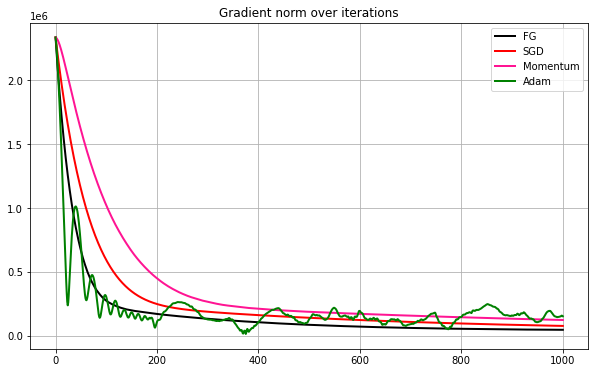

In [79]:
plt.figure(figsize = (10, 6));
plt.plot(range(len(FG)), norm_sgd, label = 'FG', color = 'black', linewidth = 2);
plt.plot(range(len(w_sgd)), norm_fg, label = 'SGD', color = 'red', linewidth = 2);
plt.plot(range(len(w_momentum)), norm_momentum, label = 'Momentum', color='deeppink', linewidth = 2);
plt.plot(range(len(w_adam)), norm_adam, label = 'Adam', color='green', linewidth = 2);
plt.title('Gradient norm over iterations');
plt.grid();
plt.legend();
plt.show();

In [88]:
#функция потерь - log(cosh(Xw-y))
#FG
max_iter = 500;
alpha = 1e-2;
tolerance=1e-4;
w_0 = np.zeros(X_test.shape[1]);
w = w_0.copy()
w_log = [w.copy()];
for i in range(max_iter):
    w -= alpha * X_test.T.dot(np.tanh(X_test.dot(w) - y_test)) / y_test.shape[0];
    if np.linalg.norm(w - w_log[-1]) > tolerance:
        w_log.append(w.copy())
    else:
        print('UPS')
        break

In [106]:
#функция потерь - log(cosh(Xw-y))
#sgd
max_iter = 500;
alpha = 5e-1;
tolerance=1e-4;
w_0 = np.zeros(X_test.shape[1]);
w = w_0.copy()
w_log_sgd = [w.copy()];
for i in range(max_iter):
    sample = np.random.choice(X_test.shape[0], size = 3000);
    w -= alpha * X_test[sample].T.dot(np.tanh(X_test[sample].dot(w) - y_test.iloc[sample])) / y_test.shape[0];
    if np.linalg.norm(w - w_log[-1]) > tolerance:
        w_log_sgd.append(w.copy())
    else:
        print('UPS')
        break

In [107]:
print(FG[-1])
print(w_log[-1])
print(w_log_sgd[-1])
print(len(w_log_sgd))

[ 2.15028839  0.36824012  2.10611773  0.06306918 -0.07207856  0.04038737
 -0.05333981]
[ 2.05421057  0.52260483  2.01148499  0.0884656  -0.0859943   0.07343062
 -0.06346572]
[ 2.06081923  0.49931353  2.04311866  0.08597454 -0.08889962  0.07476067
 -0.06425572]
501


In [108]:
w_array_sgd = np.array(w_log_sgd)
predict_log_fg = (np.mean(X_test.dot(w_array.T), axis=0));
predict_log_sgd = (np.mean(X_test.dot(w_array_sgd.T), axis=0))

In [109]:
loss_log_fg = (np.log(np.cosh([i for i in predict_log_fg] - np.mean(y_test))));
loss_log_sgd = (np.log(np.cosh([i for i in predict_log_sgd] - np.mean(y_test))));

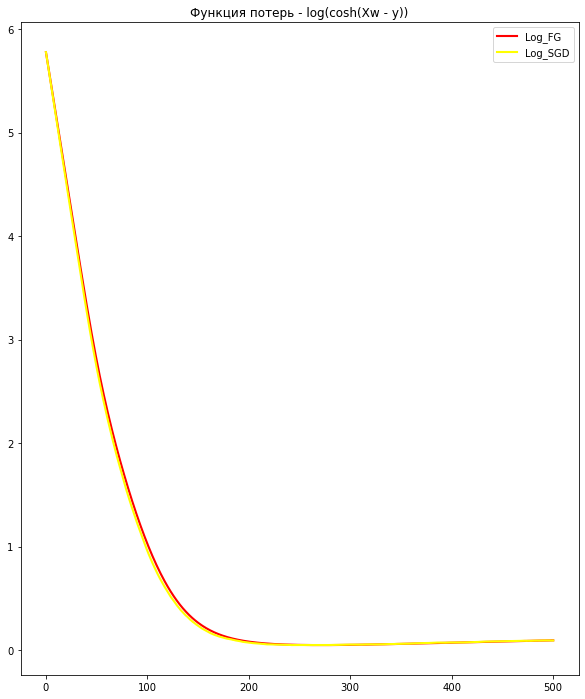

In [111]:
plt.figure(figsize=(10, 12));
plt.plot(range(len(w_log)), loss_log_fg, color = 'red', linewidth = 2.1, label = 'Log_FG');
plt.plot(range(len(w_log)), loss_log_sgd, color = 'yellow', linewidth = 2.1, label = 'Log_SGD');
plt.title('Функция потерь - log(cosh(Xw - y))')
plt.legend();
plt.show()